<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples = 100 , n_features = 2 , n_informative = 1 , n_redundant = 0 , n_classes = 2 , n_clusters_per_class = 1 , random_state= 41,hypercube=False,class_sep=20)

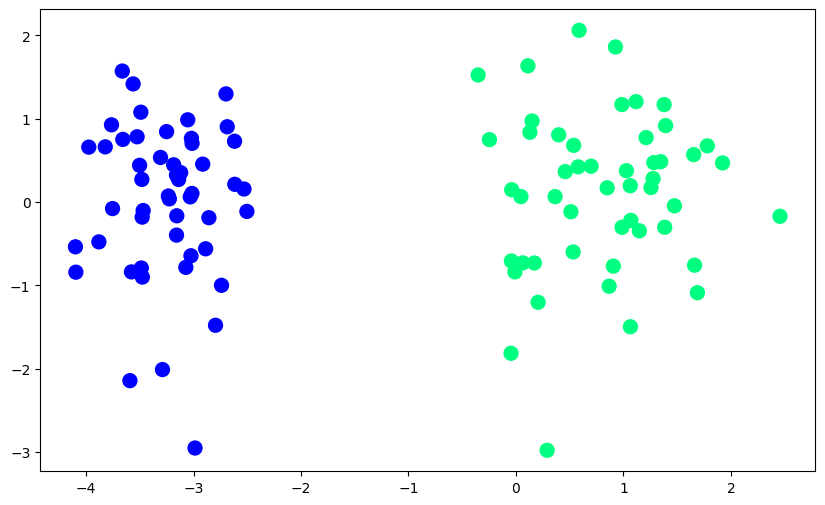

In [2]:
import matplotlib.pyplot as plt
plt .figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [3]:
x

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [5]:
def step(z):
  return 1 if z>0 else 0

In [18]:
def perceptron(x,y):
  x = np.insert(x,0,1,axis = 1)
  weights = np.ones(x.shape[1])
  lr = .1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(x[j],weights))
    weights = weights + lr*(y[j] - y_hat)*x[j]
  return weights[0],weights[1:]

In [19]:
intercept,coef = perceptron(x,y)

In [20]:
intercept

np.float64(1.2000000000000002)

In [21]:
coef

array([1.0580085 , 0.40381514])

In [22]:
m = -(coef[0]/coef[1])
m

np.float64(-2.6200317952788446)

In [23]:
b = -(intercept/coef[1])
b

np.float64(-2.9716568071029252)

In [24]:
x_input = np.linspace(-3,3,100)
y_output = m*x_input + b

(-3.0, 2.0)

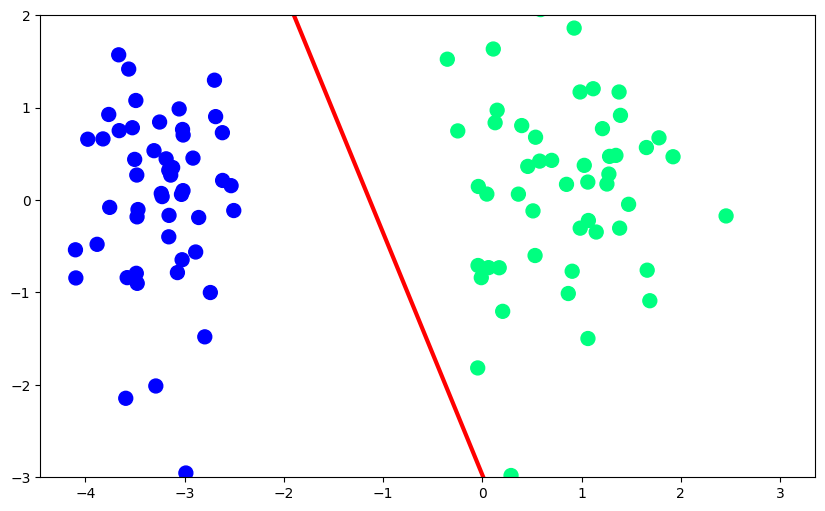

In [25]:
plt.figure(figsize = (10,6))
plt.plot(x_input,y_output,color='red',linewidth = 3)
plt.scatter(x[:,0],x[:,1],c = y,cmap='winter',s=100)
plt.ylim(-3,2)

In [33]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [34]:
lor.coef_

array([[2.36679363, 0.02300492]])

In [35]:
lor.intercept_

array([3.13571596])

In [37]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [38]:
y_output1 = m*x_input +b



(-3.0, 2.0)

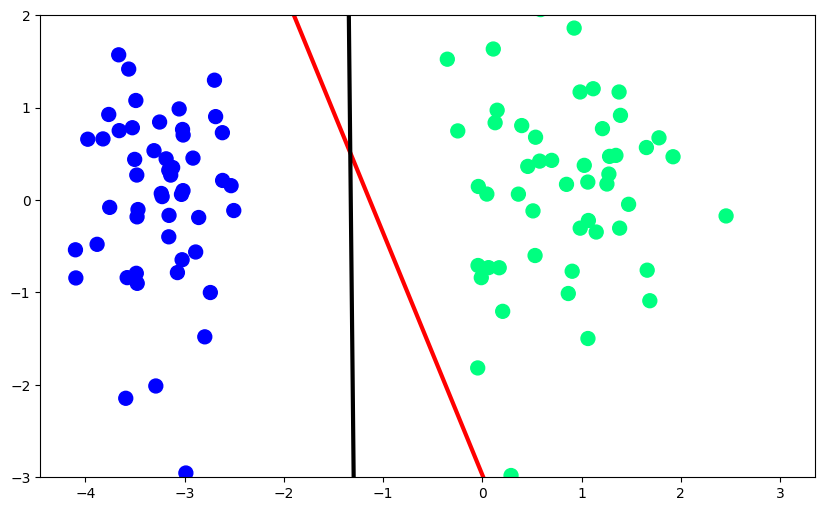

In [39]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_output,color = 'red',linewidth = 3)
plt.plot(x_input,y_output1,color='black',linewidth = 3)
plt.scatter(x[:,0],x[:,1],c = y , cmap = 'winter',s = 100)
plt.ylim(-3,2)